# Application of Neutrophil Signature

**Gregory Way, 2018**

We previously identified a specific VAE feature (z = 3) that captured neutrophil signatures.
This signature was not captured in VAE z = 2, and, when present, contributed to a rapid increase in the ability to capture the signal in GTEX blood tissues.

![cell_type_Neutrophils_IRIS.png](https://github.com/greenelab/interpret-compression/raw/master/6.analyze-weights/figures/GTEX/signal/GpXCELL/gene_set_Neutrophils_IRIS_1.png)


Here, take the specific feature from the specific weight matrix and multiply the feature by the genes in common in the publicly available neutrophil data.

## We also test the highest scoring neutrophil IRIS 1 signature

* DAE feature 2 in weight matrix from seed 229564

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import hetio.readwrite
import hetmech.matrix

from scripts.utils import load_weight_matrix, apply_signature, load_enrichment_results

sys.path.append('../scripts')
from latent import parse_gmt

In [2]:
%matplotlib inline

In [3]:
np.random.seed(123)

## 0. Load and Process External Dataset

In [4]:
file = os.path.join('data', 'GSE103706_processed_matrix.tsv.gz')
geo_scaled_zeroone_df = pd.read_table(file, index_col=0)

#geo_scaled_zeroone_df = geo_scaled_zeroone_df.T.reindex(weight_df.index).fillna(0).T
print(geo_scaled_zeroone_df.shape)
geo_scaled_zeroone_df.head(2)

(14, 19272)


,7105,64102,8813,6359,55732,2268,3075,2519,2729,4800,...,79447,140032,101234261,100996720,100527949,100862671,100861540,140,100033411,100129520
"PLB-985, not differentiated, replicate 1",0.0,0.0,0.634427,0.166941,1.000000,0.000000,0.0,0.01219,0.358691,0.40302,...,1.000000,0.0,0.0,0.173369,0.020122,0.025108,0.0,0.000093,0.0,0.0
"PLB-985, DMSO, day 6, replicate 1",0.0,0.0,0.294013,0.876342,0.041159,0.089441,0.0,0.00000,0.954808,0.65640,...,0.495317,0.0,0.0,1.000000,0.017264,0.499439,0.0,0.352886,0.0,0.0


## 1. Apply Signature from VAE z = 3 (feature 1)

In [5]:
weight_z3_df = load_weight_matrix(dataset='GTEX',
                                  z_dim=3,
                                  seed=174930)

result_vae_3_feat2 = apply_signature(weight_df=weight_z3_df,
                                     other_df=geo_scaled_zeroone_df,
                                     feature='vae_1',
                                     align=True)

In [6]:
# Process phenotype data
cell_line = [x[0] for x in result_vae_3_feat2.index.str.split(',')]
treatment = [x[1] for x in result_vae_3_feat2.index.str.split(',')]
day = [x[2].strip(' ') if 'replicate' not in x[2] else 'day 0'
       for x in result_vae_3_feat2.index.str.split(',')]

In [7]:
result_vae_3_feat2 = result_vae_3_feat2.assign(cell_line=cell_line,
                                               treatment=treatment,
                                               day=day)
result_vae_3_feat2

,vae_1,cell_line,treatment,day
"PLB-985, not differentiated, replicate 1",-35.558124,PLB-985,not differentiated,day 0
"PLB-985, DMSO, day 6, replicate 1",-82.649194,PLB-985,DMSO,day 6
"PLB-985, DMSO+Nutridoma, day 4",-84.764198,PLB-985,DMSO+Nutridoma,day 4
"PLB-985, DMSO+Nutridoma, day 6, replicate 1",-98.015138,PLB-985,DMSO+Nutridoma,day 6
"HL-60, not differentiated, replicate 1",-33.241165,HL-60,not differentiated,day 0
"HL-60, DMSO, day 6, replicate 1",-96.725758,HL-60,DMSO,day 6
"HL-60, DMSO+Nutridoma, day 6, replicate 1",-80.793671,HL-60,DMSO+Nutridoma,day 6
"PLB-985, not differentiated, replicate 2",-19.630321,PLB-985,not differentiated,day 0
"PLB-985, DMSO, day 6, replicate 2",-68.747553,PLB-985,DMSO,day 6
"PLB-985, DMSO+Nutridoma, day 2",-51.055263,PLB-985,DMSO+Nutridoma,day 2


In [8]:
recode_labels = {' not differentiated': 'Not Differentiated',
                 ' DMSO': 'DMSO',
                 ' DMSO+Nutridoma': 'DMSO+Nutridoma'}

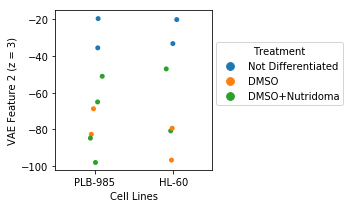

In [9]:
# Plot results
plt.rcParams['figure.figsize'] = 5, 3
ax = sns.stripplot(x='cell_line', y='vae_1', data = result_vae_3_feat2, hue = 'treatment', jitter=0.1)

handles, labels = ax.get_legend_handles_labels()
updated_labels = [recode_labels[x] for x in labels]

l = plt.legend(handles,
               updated_labels,
               bbox_to_anchor=(1.02, 0.8), loc=2, borderaxespad=0.)
l.set_title("Treatment")

ax.set_ylabel('VAE Feature 2 (z = 3)')
ax.set_xlabel('Cell Lines')

plt.tight_layout()
ccle_fig_file = os.path.join('figures', 'GSE103706_neutrophil_signature_vae_feature_2_z3.png')
plt.savefig(ccle_fig_file, height=4, width=4, dpi=500)

## 2. Apply Signature from DAE z = 6 (feature 2)

In [10]:
weight_z6_df = load_weight_matrix(dataset='GTEX',
                                  z_dim=6,
                                  seed=229564)

result_dae_6_feat3 = apply_signature(weight_df=weight_z6_df,
                                     other_df=geo_scaled_zeroone_df,
                                     feature='dae_2',
                                     align=True)

In [11]:
result_dae_6_feat3 = result_dae_6_feat3.assign(cell_line=cell_line,
                                               treatment=treatment,
                                               day=day)
result_dae_6_feat3

,dae_2,cell_line,treatment,day
"PLB-985, not differentiated, replicate 1",-11.988377,PLB-985,not differentiated,day 0
"PLB-985, DMSO, day 6, replicate 1",-32.911733,PLB-985,DMSO,day 6
"PLB-985, DMSO+Nutridoma, day 4",-49.442719,PLB-985,DMSO+Nutridoma,day 4
"PLB-985, DMSO+Nutridoma, day 6, replicate 1",-61.330717,PLB-985,DMSO+Nutridoma,day 6
"HL-60, not differentiated, replicate 1",-27.475794,HL-60,not differentiated,day 0
"HL-60, DMSO, day 6, replicate 1",-43.374865,HL-60,DMSO,day 6
"HL-60, DMSO+Nutridoma, day 6, replicate 1",-65.550652,HL-60,DMSO+Nutridoma,day 6
"PLB-985, not differentiated, replicate 2",-15.120117,PLB-985,not differentiated,day 0
"PLB-985, DMSO, day 6, replicate 2",-29.698653,PLB-985,DMSO,day 6
"PLB-985, DMSO+Nutridoma, day 2",-35.938332,PLB-985,DMSO+Nutridoma,day 2


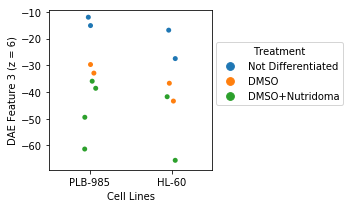

In [12]:
# Plot results
plt.rcParams['figure.figsize'] = 5, 3
ax = sns.stripplot(x='cell_line', y='dae_2', data = result_dae_6_feat3, hue = 'treatment', jitter=0.1)

handles, labels = ax.get_legend_handles_labels()
updated_labels = [recode_labels[x] for x in labels]

l = plt.legend(handles,
               updated_labels,
               bbox_to_anchor=(1.02, 0.8), loc=2, borderaxespad=0.)
l.set_title("Treatment")

ax.set_ylabel('DAE Feature 3 (z = 6)')
ax.set_xlabel('Cell Lines')

plt.tight_layout()
ccle_fig_file = os.path.join('figures', 'GSE103706_neutrophil_signature_dae_feature_3_z6.png')
plt.savefig(ccle_fig_file, height=4, width=4, dpi=500)

## Compare the Two Signatures

In [13]:
# What other genesets are enriched in this DAE feature?
dae_z6_p2 = load_enrichment_results(dataset='GTEX',
                                    z_dim=6,
                                    metaedge='GpXCELL',
                                    algorithm='dae',
                                    feature=2,
                                    seed=229564,
                                    shuffled=False)

dae_z6_p2.head(3)

,model_type,variable,value,z_score,algorithm,feature,z,seed
6,real,Neutrophils_IRIS_1,-4.98508,-70.6996,dae,2,6,229564
62,real,HSC_FANTOM_2,-1.64341,-39.9409,dae,2,6,229564
340,real,Hepatocytes_HPCA_3,-33.87700,-22.6499,dae,2,6,229564


In [14]:
# What other genesets are enriched in this DAE feature?
vae_z3_p1 = load_enrichment_results(dataset='GTEX',
                                    z_dim=3,
                                    metaedge='GpXCELL',
                                    algorithm='vae',
                                    feature=1,
                                    seed=174930,
                                    shuffled=False)

vae_z3_p1.head(3)

,model_type,variable,value,z_score,algorithm,feature,z,seed
14,real,Neutrophils_IRIS_1,-2.72158,-42.5443,vae,1,3,174930
320,real,Neutrophils_HPCA_3,-6.12055,-17.8212,vae,1,3,174930
352,real,Neutrophils_FANTOM_1,-4.65762,-17.3036,vae,1,3,174930


In [15]:
full_test_df = vae_z3_p1.merge(dae_z6_p2, on='variable', suffixes=('_vae', '_dae'))

file = os.path.join('results', 'latent_feature_enrichment_comparison_neutrophil_genesets.tsv')
full_test_df.to_csv(file, index=False, sep='\t')

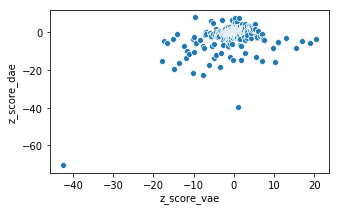

In [16]:
# Save dataframe for better plotting in R, but visualize quickly here
sns.scatterplot(data=full_test_df, x='z_score_vae', y='z_score_dae');

In [17]:
# First, load the XCELL dataset and extract genes that belong to neutrophil processes
geneset_file = os.path.join('..', '3.build-hetnets', 'data', 'xcell_all_entrez.gmt')
xcell_genesets_gmt = parse_gmt(gene_sets=[geneset_file])
len(xcell_genesets_gmt)

489

In [18]:
unique_genes = []
for geneset_name, geneset in xcell_genesets_gmt.items():
    for gene in geneset:
        unique_genes.append(gene)

unique_genes = set(unique_genes)

classification_genes = []
for geneset_name, geneset in xcell_genesets_gmt.items():
    if 'neutrophil' in geneset_name.lower():
        classification = 'Neutrophils'
    elif 'hsc' in geneset_name.lower():
        classification = 'Hematopoetic'
    elif 'hepatocytes' in geneset_name.lower():
        classification = 'Hepatocytes'
    elif 'skeletal' in geneset_name.lower():
        classification = 'Skeletal Muscle'
    else:
        classification = 'Other Geneset'
    for gene in geneset:
        if gene in weight_z6_df.index:
            classification_genes.append([classification, gene, geneset_name])

In [19]:
result = pd.DataFrame(classification_genes, columns=['classification', 'gene', 'gene_set'])
result = result.sort_values(by='classification').reset_index(drop=True)
result = result.drop_duplicates(subset='gene', keep='first')
result.gene = result.gene.astype(str)
result.index = result.gene
result.head()

,classification,gene,gene_set
gene,,,
80177,Hematopoetic,80177,HSC_BLUEPRINT_2
2006,Hematopoetic,2006,HSC_FANTOM_3
51705,Hematopoetic,51705,HSC_FANTOM_3
6856,Hematopoetic,6856,HSC_NOVERSHTERN_3
2078,Hematopoetic,2078,HSC_BLUEPRINT_1


In [20]:
result.classification.value_counts()

Other Geneset      2484
Hepatocytes         183
Neutrophils          51
Hematopoetic         20
Skeletal Muscle      13
Name: classification, dtype: int64

In [21]:
both_weight_df = (
    weight_z3_df.merge(weight_z6_df, left_index=True, right_index=True, suffixes=('_3', '_6'))
    .merge(result, left_index=True, right_index=True, how='left')
    .fillna('No Geneset')
)

file = os.path.join('results', 'latent_feature_enrichment_comparison_neutrophil_genes.tsv')
both_weight_df.to_csv(file, index=False, sep='\t')

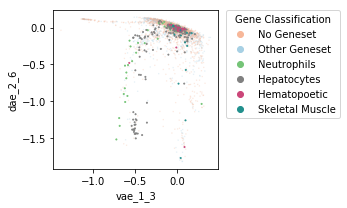

In [22]:
ax = sns.scatterplot(x='vae_1_3',
                     y='dae_2_6',
                     data=both_weight_df.query("classification in ['Other Geneset', 'No Geneset']"),
                     hue='classification',
                     palette='RdBu',
                     legend='full',
                     s=0.6,
                     edgecolor=None,
                     alpha=0.2)

ax = sns.scatterplot(x='vae_1_3',
                     y='dae_2_6',
                     data=both_weight_df.query("classification == 'Neutrophils'"),
                     hue='classification',
                     palette='Greens_r',
                     legend='full',
                     s=1.6,
                     edgecolor=None,
                     alpha=1)

ax = sns.scatterplot(x='vae_1_3',
                     y='dae_2_6',
                     data=both_weight_df.query("classification == 'Hepatocytes'"),
                     hue='classification',
                     palette='gray',
                     legend='full',
                     s=1.6,
                     edgecolor=None,
                     alpha=0.9)

ax = sns.scatterplot(x='vae_1_3',
                     y='dae_2_6',
                     data=both_weight_df.query("classification == 'Hematopoetic'"),
                     hue='classification',
                     palette='plasma_r',
                     legend='full',
                     s=1.6,
                     edgecolor=None,
                     alpha=0.9)

ax = sns.scatterplot(x='vae_1_3',
                     y='dae_2_6',
                     data=both_weight_df.query("classification == 'Skeletal Muscle'"),
                     hue='classification',
                     palette='viridis_r',
                     legend='full',
                     s=1.6,
                     edgecolor=None,
                     alpha=0.9)

handles, labels = ax.get_legend_handles_labels()

use_handles = []
use_labels = []
for h, l in zip(handles, labels):
    if l != 'classification':
        use_handles.append(h)
        use_labels.append(l)
        
l = plt.legend(use_handles, use_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True)
l.set_title('Gene Classification')
plt.tight_layout()
plt.savefig('test.png', dpi=600, width=10, height=6)